<a href="https://www.kaggle.com/code/sunblakhan/project-1-exploratory-data-analysis-eda-on-tita?scriptVersionId=202276225" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

DataSet: Passenger info about Titanic
Problem Statement: Using the different features, we have to predict who would survive during titanic incident or not.
Steps:
1. import and load the dataset from Kaggle
2. Importing different libraries (Pandas for handling datasets in dataframe, Numpy for mathematical operations on 1 dimensional and 2 dimentional data, Matplotlib for data visualization, Seaborn also for data visualization and some deep analysis with the help of mathematical concepts)
3. Exploratory Analysis

# Importing the Data Set # 

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("qiqiqi7/11117")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/11117


# Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/11117/train.csv
/kaggle/input/11117/test.csv
/kaggle/input/11117/gender_submission.csv


# Loading DataSet

In [3]:
df = pd.read_csv("/kaggle/input/11117/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Analysis

First step is to check if your data is all set or needs to be cleaned and organized in a way you need to use.   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As it can be seen that Age, Cabin, and Embarked column have null values that we need to work on first.

In [5]:
# Same information can also be seen by using isnull method
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Representation of Null Values in each Column')

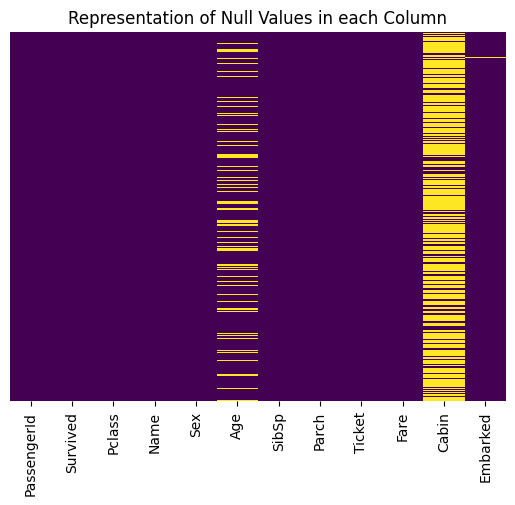

In [6]:
# Also, by using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = "viridis")
plt.title("Representation of Null Values in each Column")

As per observation, we can see that we have about 20% of data missing in age column which can be tackled by dropping the null rows but on the other hand, we have about 80% of data missing in cabin columns which can't be tackled by dropping the row or we will lose alot of useful data. 

First let's see how our survived column looks like on the train dataset

Text(0.5, 1.0, 'Survival Rate Of Passengers')

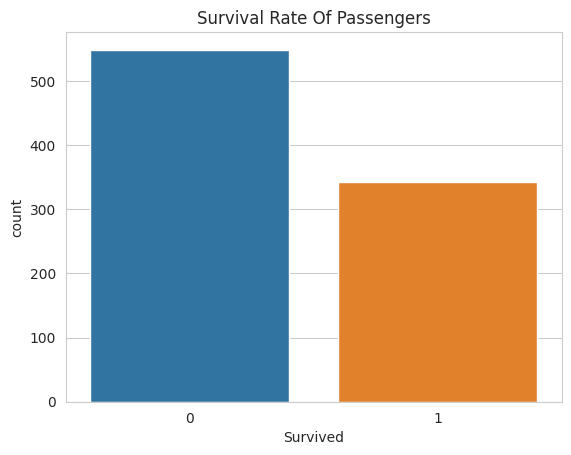

In [7]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",data = df)
plt.title("Survival Rate Of Passengers")

Here, we can see that the people who didn't survived are shown in blue with a value of 0 and it has a count of more than 500. While the people who survived are shown in orange column with a value of 1 which is about 350 something. 

Now let's see how the representation of survived looks like based on the gender column

Text(0.5, 1.0, 'Survival rate by Sex')

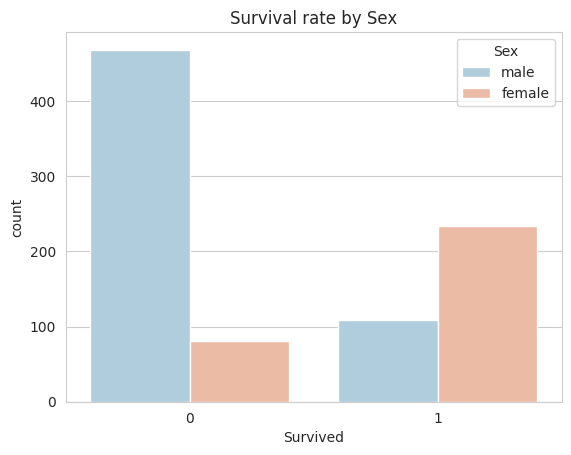

In [8]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",hue="Sex",data = df, palette="RdBu_r")
plt.title("Survival rate by Sex")

Here, we can see that only around 100 or more male survived and more than 400 male were not able to survive. On the other hand, female survival rate was much higher with 200 and more and less than 100 female were not able to survive the incident.

Now let's observe the data by passenger class column

Text(0.5, 1.0, 'Survival rate by Passenger Class (Pclass)')

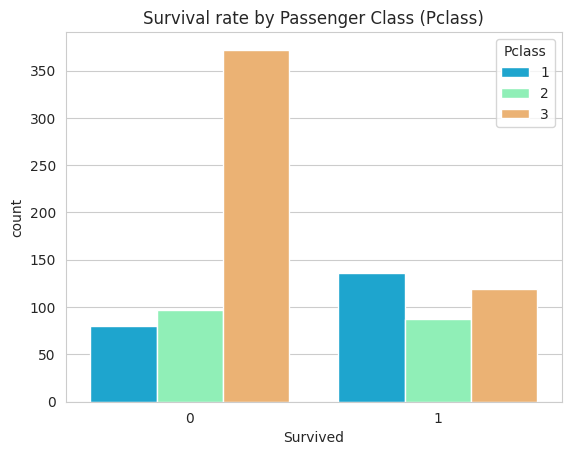

In [9]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",hue="Pclass",data = df, palette="rainbow")
plt.title("Survival rate by Passenger Class (Pclass)")

Here, we can see that people who were rich and had the highest passenger class were amonng those who couldn't survive while poor and middle class has a number under 100.

Now let's explore more age column and see the frequency of different people by different age.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


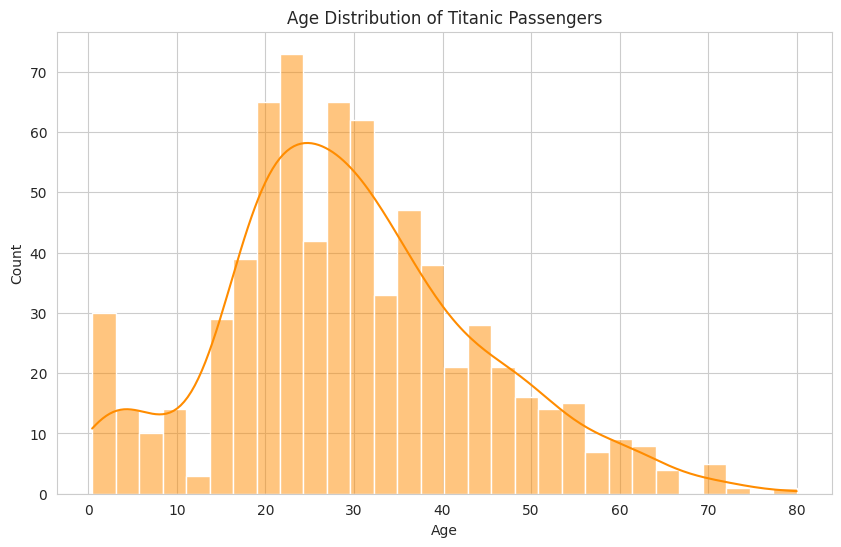

In [10]:
# using histplot
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color="darkorange")
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Here, we can observe that the people between 18-35 had the more frequence which means the people were more amond this age range on the titanic - more like a bell curve

Now, let's explore SibSp (sibling and spouse) column

Text(0.5, 1.0, 'Siblings Per each Passenger')

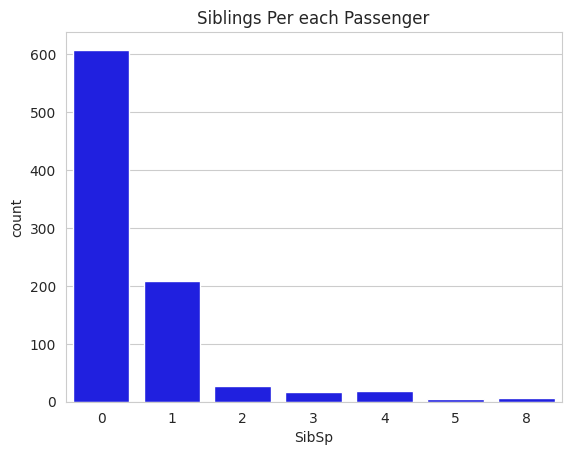

In [11]:
sns.countplot(x = "SibSp", data = df, color="blue")
plt.title("Siblings Per each Passenger")

It tells us that people about 600 didn't have any sibling or spouse and very little number had 1,2, and so on.

Let's have some analysis on Fare columns too

# Data Cleaning 

A simple way of dealing null values in the dataset is by dropping the rows but when you lose the rows, that means you are also losing the useful data so it's not an ideal option depending on the dataset. So we can observe age column more and see if we can predict the average ages of passengers depending on the passengar class column. This process is called feature engineering

Text(0.5, 1.0, 'Average age per each passengar class')

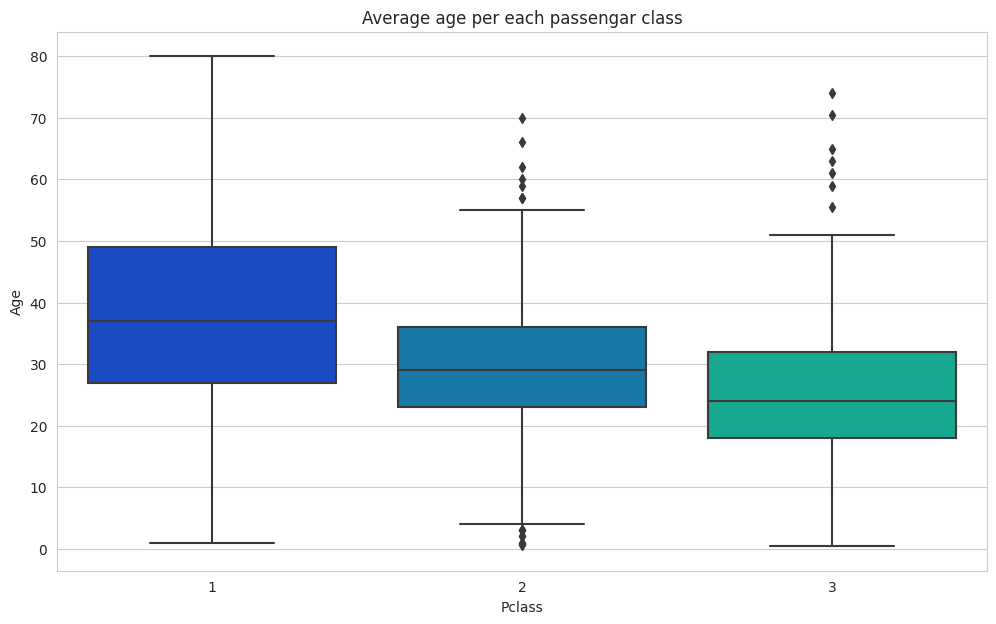

In [12]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "Pclass", y = "Age", data = df, palette = "winter")
plt.title("Average age per each passengar class")

**Feature Engineering on Column Age**

Here, we can see that we have three box plots representing 25%,50% and 75% quantile of all three classes. The average age of class 1 is 37, class 2 with 29, and class 3 is 24. So we are now creating a function that will look for the missing values and fill them up with the averge numbers for each class messanger.

In [13]:
#create a function to add the missing values depending on the average value we have for each column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [14]:
df["Age"] = df [["Age","Pclass"]].apply(impute_age,axis=1)

/tmp/ipykernel_17/2764784294.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_17/2764784294.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

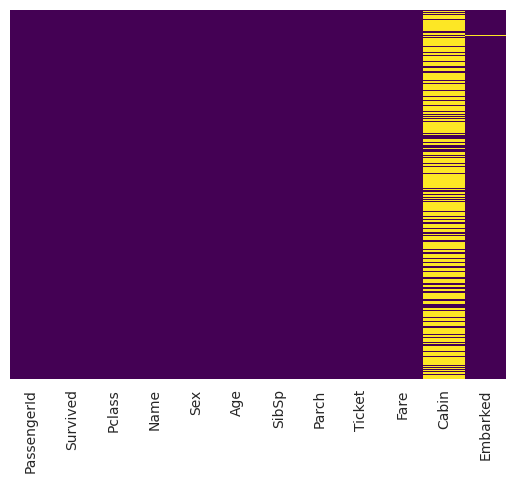

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = "viridis")

Now After this, we can see in our heatmap that we no longer have any null values in age column. Now moving towards Cabin column, the problem is we can't predict the string data of cabin numbers since we are unaware of that. So we can just drop the column in this case since it's not really useful with only 20% values.

In [16]:
df.drop(columns = "Cabin", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Converting Categorical Data into Numeric Data

Now the next step is to adjust our dataset for a training set. For example, we are looking for numeric data so we can make the predictions easily and that is why we need to remove columns that are not necessary For example, we don't need "Sex","Embarked","Name","Ticket". so we will either drop them or make them into numberic form.

In [17]:
pd.get_dummies(df["Embarked"],drop_first = True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


We need Sex and embarked columns so we can just convert them into values of 0, 1. 

In [18]:
sex = pd.get_dummies(df["Sex"],drop_first = True)
embarked = pd.get_dummies(df["Embarked"],drop_first = True)

In [19]:
df.drop(columns = ["Sex","Embarked","Name","Ticket"],inplace = True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Now our data is all in numeric form but now we first need to concat two columns of sex and embarked into the dataset that will be used for training later.

In [21]:
df = pd.concat([df,sex,embarked], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


# Logistic Regression Model Building

**Train And Test Split Data**

Now for training, we need to divide data into features training data (X_train) and prediction for survival (y_test)

In [22]:
df.drop("Survived",axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [23]:
df["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

Here, we have divided our dataset into four variable X_train with df without survived column, X_test with only survived column, y_train with a size of 0.30, and y_test with a random state of 101. 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Survived",axis = 1),
    df["Survived"],test_size=0.30,random_state = 101
)

# Model Training and Prediction 

In [26]:
from sklearn.linear_model import LogisticRegression

Here, we created and fitted a logisticRegression Model for training

In [27]:
logmodel = LogisticRegression()

In [28]:
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

and now based on the data, we used the prediction and generated the results that are stored in the variable prediction

In [29]:
prediction = logmodel.predict(X_test)

# Model Evaluation

In [30]:
from sklearn.metrics import confusion_matrix

Now, we are checking the accuracy of our model using the confusion matric

In [31]:
accuracy = confusion_matrix(y_test,prediction)
accuracy

array([[133,  21],
       [ 42,  72]])

In [32]:
from sklearn.metrics import accuracy_score

Now, we are checking the accuracy of our model using the accuracy score

In [33]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.7649253731343284

Our model is generating 76% correct results which shows that it would be useful for predicting the survival rate.

In [34]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.63      0.70       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



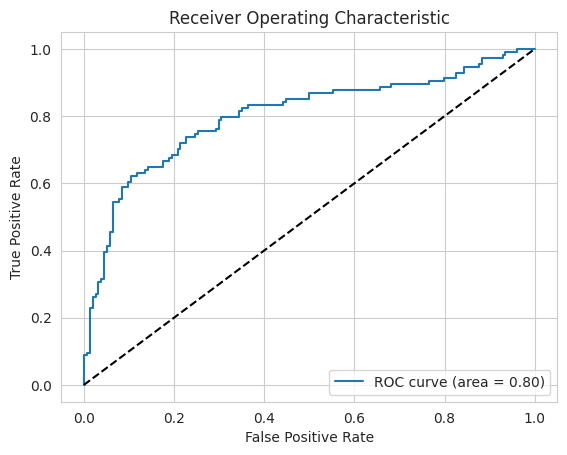

In [36]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = logmodel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logmodel, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


Cross-Validation Accuracy: 0.80 ± 0.05


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Summary:

1. 